In [136]:
# importing needed datasets for mnist
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers, models


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
#Sparar datan till train och test dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [138]:
#normaliserar test och traindataseten

num_classes = 10
input_shape = (28, 28, 1)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [139]:
#avrundar datan till 1:ttor och 0:or
x_train = np.around(x_train)
x_test = np.around(x_test)

In [123]:
#expanderar dim


x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [140]:
#omderiskerar datan mer


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [141]:
#Testa för att se om det fungerar

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples" )

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [126]:
#skappar modelen som används

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [151]:
#compilerar modellen samt kan man sätta in batch-sizen och epocherna själv för mer träffsäker eller snabbare laddande data

batch_size = 126
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [108]:
#Testar och validerar sig själv mot test datan

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    validation_data=(x_test, y_test))

Epoch 1/5
235/235 [==============================] - 19s 80ms/step - loss: 0.4628 - accuracy: 0.8628 - val_loss: 0.1104 - val_accuracy: 0.9664
Epoch 2/5
235/235 [==============================] - 21s 87ms/step - loss: 0.1358 - accuracy: 0.9590 - val_loss: 0.0735 - val_accuracy: 0.9767
Epoch 3/5
235/235 [==============================] - 20s 86ms/step - loss: 0.1019 - accuracy: 0.9690 - val_loss: 0.0576 - val_accuracy: 0.9820
Epoch 4/5
235/235 [==============================] - 20s 86ms/step - loss: 0.0840 - accuracy: 0.9742 - val_loss: 0.0517 - val_accuracy: 0.9836
Epoch 5/5
235/235 [==============================] - 21s 90ms/step - loss: 0.0742 - accuracy: 0.9774 - val_loss: 0.0456 - val_accuracy: 0.9847


In [109]:
#testar och validerar sig själv mot sig själv 10%

history2 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/5
211/211 [==============================] - 19s 90ms/step - loss: 0.0692 - accuracy: 0.9787 - val_loss: 0.0404 - val_accuracy: 0.9892
Epoch 2/5
211/211 [==============================] - 20s 95ms/step - loss: 0.0620 - accuracy: 0.9805 - val_loss: 0.0391 - val_accuracy: 0.9903
Epoch 3/5
211/211 [==============================] - 20s 94ms/step - loss: 0.0596 - accuracy: 0.9815 - val_loss: 0.0399 - val_accuracy: 0.9898
Epoch 4/5
211/211 [==============================] - 21s 98ms/step - loss: 0.0569 - accuracy: 0.9824 - val_loss: 0.0378 - val_accuracy: 0.9898
Epoch 5/5
211/211 [==============================] - 18s 85ms/step - loss: 0.0522 - accuracy: 0.9836 - val_loss: 0.0368 - val_accuracy: 0.9893


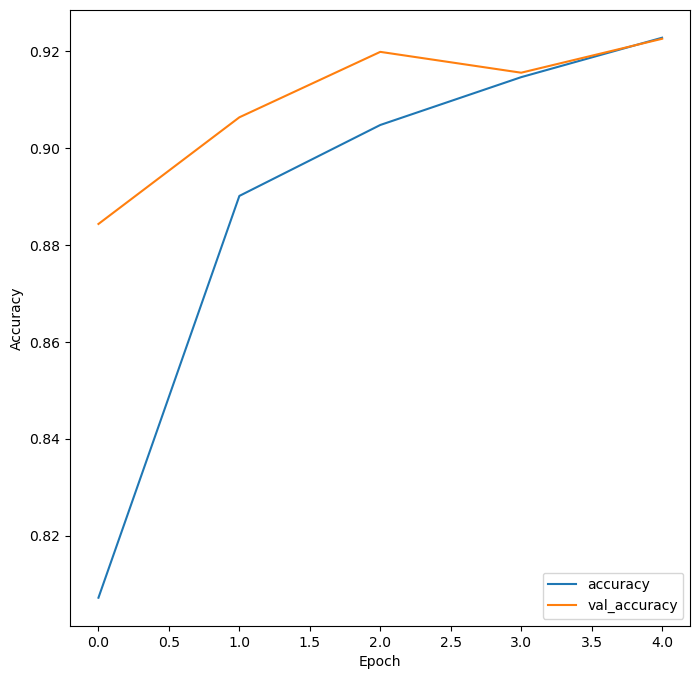

In [155]:
#plotar ut datan som sammanfallit

plt.figure(figsize=(8, 8))
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.savefig("output_report.png")

In [121]:
#inför andra model

x_train2 = np.stack((x_train,)*3, axis=-1)
x_test2 = np.stack((x_test,)*3, axis=-1)

In [142]:
print("x_train shape:", x_train2.shape)

x_train shape: (60000, 28, 28, 3)


In [143]:
#dataset för resnet50

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [152]:
#load once for resnet50 har trainable av för lag

model2 = Sequential()

model2.add(ResNet50(include_top=False, pooling="avg", weights="imagenet"))

model2.add(Dense(512, activation="relu"))
model2.add(Dense(10, activation="softmax"))

model2.layers[0].trainable=False
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_7 (Dense)             (None, 512)               1049088   
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24641930 (94.00 MB)
Trainable params: 1054218 (4.02 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [153]:
#compilering av resnet50 modellen

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [154]:
history3 = model2.fit(x_train2, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test2, y_test))

Epoch 1/5
477/477 [==============================] - 118s 243ms/step - loss: 0.6403 - accuracy: 0.8072 - val_loss: 0.3723 - val_accuracy: 0.8843
Epoch 2/5
477/477 [==============================] - 129s 271ms/step - loss: 0.3529 - accuracy: 0.8901 - val_loss: 0.2983 - val_accuracy: 0.9063
Epoch 3/5
477/477 [==============================] - 140s 293ms/step - loss: 0.2994 - accuracy: 0.9047 - val_loss: 0.2552 - val_accuracy: 0.9198
Epoch 4/5
477/477 [==============================] - 136s 286ms/step - loss: 0.2675 - accuracy: 0.9146 - val_loss: 0.2597 - val_accuracy: 0.9155
Epoch 5/5
477/477 [==============================] - 140s 293ms/step - loss: 0.2449 - accuracy: 0.9227 - val_loss: 0.2309 - val_accuracy: 0.9225
